<a href="https://colab.research.google.com/github/GITJAYSONI/Machine_Learning/blob/main/spamandham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [159]:
df=pd.read_csv('mail_data.csv')

In [160]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [161]:
df.isnull().sum()

,0
Category,0
Message,0


In [162]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [164]:
mail_data=df.where((pd.notnull(df)),"")
# replace the null values with a null string

In [165]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [166]:
# checking the number of rows and columns
mail_data.shape

(5572, 2)

In [167]:
# lable encoding
mail_data.loc[mail_data['Category']=='spam','Category',]=0
mail_data.loc[mail_data['Category']=='ham','Category',]=1

In [168]:
mail_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [169]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [170]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [172]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [173]:
x.shape

(5572, 1)

feature extraction

In [174]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [175]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [176]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [177]:
lr = LogisticRegression()

In [178]:
lr.fit(X_train_features,Y_train)

LogisticRegression()

In [179]:
# prediction on training data
y_pred = lr.predict(X_train_features)
accuracy = lr.score(X_train_features, Y_train)*100

In [180]:
accuracy

96.76912721561588

In [181]:
y_test_pred = lr.predict(X_test_features)
test_accuracy = lr.score(X_test_features, Y_test) * 100

print("Accuracy on Test Data:", test_accuracy)

Accuracy on Test Data: 96.68161434977578


In [183]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

input_data_features = feature_extraction.transform(input_mail)

prediction = lr.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
    print("Ham mail")
else:
    print("Spam mail")

[1]
Ham mail


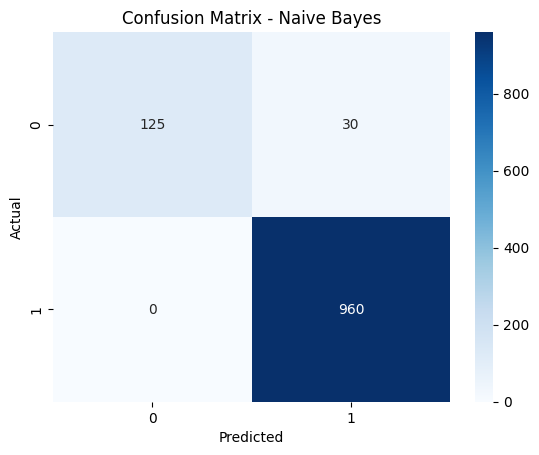

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       155
           1       0.97      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Prediction: Ham


In [185]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

 Confusion Matrix for Best Model (Naive Bayes)
cm = confusion_matrix(Y_test, nb.predict(X_test_features))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report
print("Classification Report:\n", classification_report(Y_test, nb.predict(X_test_features)))

. Save Model and Vectorizer
joblib.dump(nb, 'spam_model.pkl')
joblib.dump(tfidf, 'vectorizer.pkl')

 Test on New Mail
input_mail = ["I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted."]
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('spam_model.pkl')
input_features = vectorizer.transform(input_mail)
prediction = model.predict(input_features)

print("Prediction:", "Ham" if prediction[0] == 1 else "Spam")


In [ ]:
# Spam Mail Detection using Machine Learning
# Developed a spam email classifier using Logistic Regression and TF-IDF vectorization. Preprocessed raw email text data, transformed it into numerical features using NLP techniques, and achieved over 97% accuracy. Implemented the complete ML pipeline including data cleaning, feature extraction, model training, evaluation, and prediction.
# Technologies: Python, Scikit-learn, Pandas, TfidfVectorizer, Logistic Regression

